# Covid-19 Analysis

## Introduction

COVID-19 is a disease caused by the SARS-CoV-2 coronavirus, which presents a clinical picture that varies from asymptomatic infections to severe respiratory conditions. According to the CDC (Centers for Disease Control and Prevention), the new coronavirus of 2019 is a virus identified as the cause of an outbreak of respiratory disease first detected in Wuhan, China, where many of the outbreak patients would have some link to a large fruit market of the sea and wild animals. One suspicion, according to researchers, is that the virus, which lives in the tract respiratory system of bats has undergone a mutation process to be able to install itself in the human body.

An increasing number of patients reportedly had no exposure to the animal market, indicating the
occurrence of spread from person to person. However, it is not yet clear how the new Coronavirus has infected people in China.

According to the World Health Organization (WHO), most patients with COVID-19 (about 80%) may be asymptomatic and about 20% of cases may require hospital care for have difficulty breathing and of these cases approximately 5% may need support for the treatment of respiratory failure (ventilatory support).
The virus has now spread to virtually every country in the world, causing many deaths and serious problems in the economy.

In this work, we intend to study the contagion of coronavirus worldwide since its first
case, which occurred on the 26th of January until the 6th of April and for that we will use the data provided
on the Kaggle platform https://www.kaggle.com/c/covid19-global-forecasting-week-3.

## Exporatory Data Analysis

In this section, we are going to explore the data we obtain from Kaggle's database. Here, we'll use some Python library like pandas, matplotlib, seaborn, etc in order to understand our data plus the occurence of coronavirus around the world. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [3]:
df.isnull().sum()

Id                    0
Province_State    13376
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [4]:
df.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23256 non-null  int64  
 1   Province_State  9880 non-null   object 
 2   Country_Region  23256 non-null  object 
 3   Date            23256 non-null  object 
 4   ConfirmedCases  23256 non-null  float64
 5   Fatalities      23256 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Id,ConfirmedCases,Fatalities
count,23256.000000,23256.000000,23256.000000
mean,16356.000000,750.543946,34.440746
std,9451.979462,6008.725072,438.508692
min,1.000000,0.000000,0.000000
25%,8170.750000,0.000000,0.000000
50%,16356.000000,0.000000,0.000000
75%,24541.250000,67.000000,0.000000
max,32711.000000,136675.000000,16523.000000


First of all we're going to convert column "Date" to datetime format and check if that convertion has worked.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

### Add some columns

Now we're going to add some columns in order to get informations easyer. First, we'll add a "Month" column to filter the exactly month the problem occurs. Then, we're going to add two new columns to explicitly show how many occurrences there were by day: "ConfirmedCases-Day" and "Fatalities-Day" (note that thoses quantities have been added since day one and that shows the overall number). In addition, it'll be very helpfull to treat missing values on "Province_State" column by filling in with "Other", which represents all those unknown places Covid-19 has been detected.

In [9]:
meses = []
for date in df['Date']:
    meses.append(date.month)

In [10]:
df['Month'] = meses
df['Province_State'].fillna('Other', inplace=True)

Finally, let's add "ConfirmedCases-Day" and "Fatalities-Day" columns using the function below. 

In [11]:
def adiciona_colunas(dataframe, coluna, nova_coluna):
    dados = []
    for pais in dataframe['Country_Region'].unique():
        df_pais = dataframe[dataframe['Country_Region'] == pais] # Dataframe dos paises
        for provincia in df_pais['Province_State'].unique():
            dados_provincia = df_pais[df_pais['Province_State'] == provincia] # Dataframe das províncias
            lista = list(dados_provincia[coluna])
            a0 = df_pais[df_pais['Province_State'] == provincia][coluna].values[0]
            for c in range(0, len(lista)):
                if c == 0:
                    dados.append(a0)
                else:
                    a1 = lista[c]
                    a2 = a1 - a0
                    if a2 > 0:
                        dados.append(a2)
                    else:
                        a2 = 0
                        dados.append(a2)
                    a0 = a1
    dataframe[nova_coluna] = dados
    return dataframe

In [12]:
df = adiciona_colunas(df, 'ConfirmedCases', 'ConfirmedCases-Day')
df = adiciona_colunas(df, 'Fatalities', 'Fatalities-Day')

Let's check the new dataframe now. 

In [13]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,ConfirmedCases-Day,Fatalities-Day
0,1,Other,Afghanistan,2020-01-22,0.0,0.0,1,0.0,0.0
1,2,Other,Afghanistan,2020-01-23,0.0,0.0,1,0.0,0.0
2,3,Other,Afghanistan,2020-01-24,0.0,0.0,1,0.0,0.0
3,4,Other,Afghanistan,2020-01-25,0.0,0.0,1,0.0,0.0
4,5,Other,Afghanistan,2020-01-26,0.0,0.0,1,0.0,0.0


That is the dataframe we'll use from now on.

### Plots

Now, we are going to start our data exploratory analysis by ploting some datas that will help us to have a better understanding about our dataset. First of all, let´s check the evolution of confirmed cases and fatalities throug time. Here, we're considering the numbers for each day cases.

- Confirmed cases by day

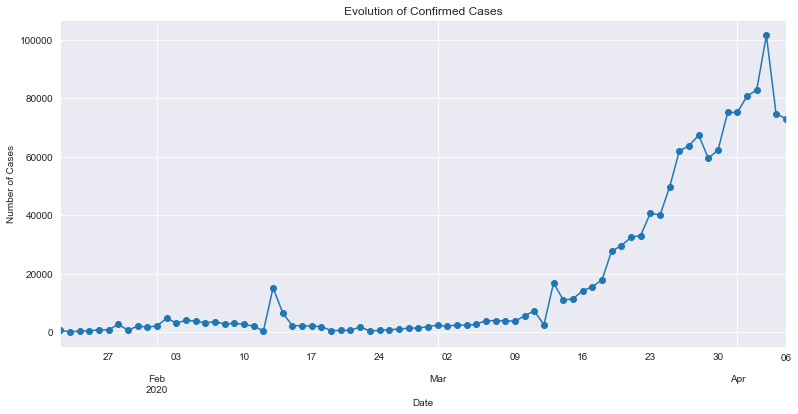

In [14]:
fig = plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
df.groupby(['Date'])['ConfirmedCases-Day'].sum().plot(marker='o')
plt.title('Evolution of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

- Fatalities by day

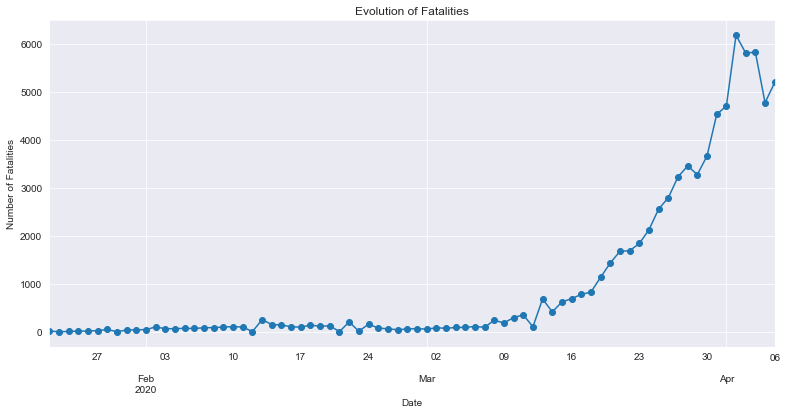

In [15]:
fig = plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
df.groupby(['Date'])['Fatalities-Day'].sum().plot(marker='o')
plt.title('Evolution of Fatalities')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

Now, we're going to show plots for the same fetures above, but considering accumulated numbers.

- Confirmed Cases

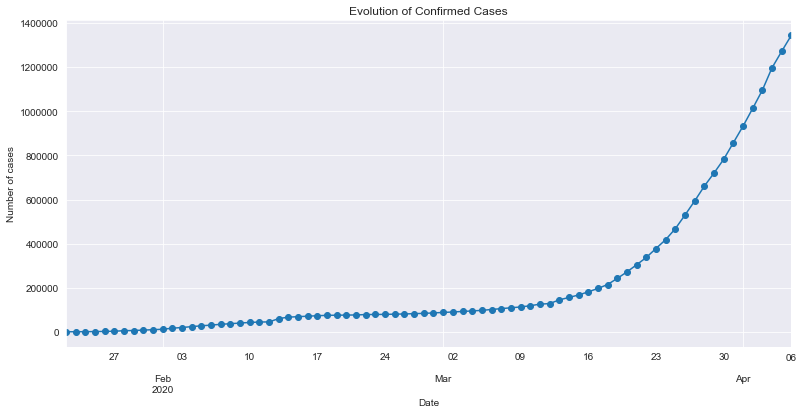

In [16]:
fig = plt.figure(figsize=(13,6))
df.groupby(['Date'])['ConfirmedCases'].sum().plot(marker='o')
plt.title('Evolution of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.show()

- Fatalities

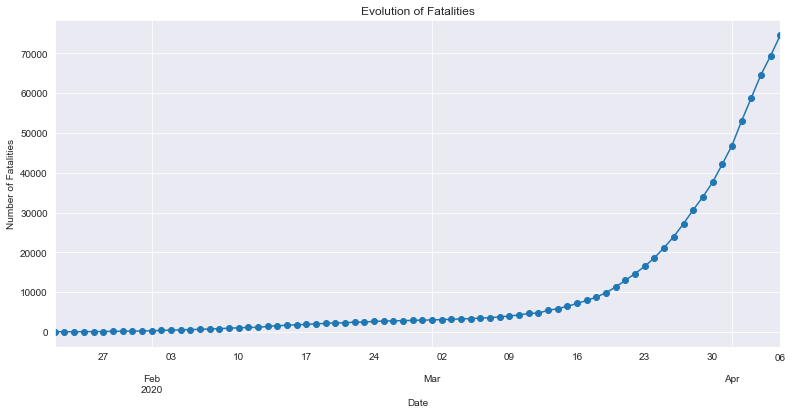

In [17]:
fig = plt.figure(figsize=(13,6))
df.groupby(['Date'])['Fatalities'].sum().plot(marker='o')
plt.title('Evolution of Fatalities')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

- Countries with the most occurrence of Covid-19

In [18]:
top_10 = df.groupby(by='Country_Region')['ConfirmedCases'].max().sort_values(ascending=False).nlargest(10).reset_index()
top_10

,Country_Region,ConfirmedCases
0,Spain,136675.0
1,Italy,132547.0
2,US,131815.0
3,Germany,103374.0
4,France,98010.0
5,China,67803.0
6,Iran,60500.0
7,United Kingdom,51608.0
8,Turkey,30217.0
9,Switzerland,21657.0


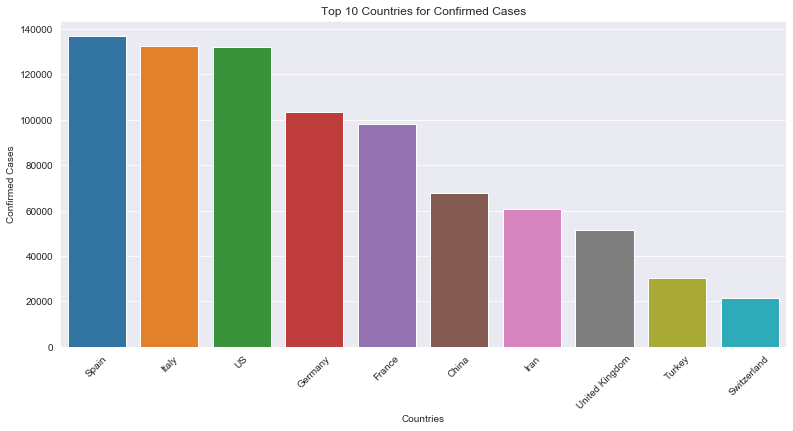

In [19]:
fig = plt.figure(figsize=(13,6))
sns.barplot(data=top_10, x='Country_Region', y='ConfirmedCases')
plt.title('Top 10 Countries for Confirmed Cases')
plt.xlabel('Countries')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

- Countries with the most fatalities of Covid-19 

In [20]:
top_10 = df.groupby(by='Country_Region')['Fatalities'].max().sort_values(ascending=False).nlargest(10).reset_index()
top_10

,Country_Region,Fatalities
0,Italy,16523.0
1,Spain,13341.0
2,France,8911.0
3,United Kingdom,5373.0
4,US,4698.0
5,Iran,3739.0
6,China,3212.0
7,Netherlands,1867.0
8,Germany,1810.0
9,Belgium,1632.0


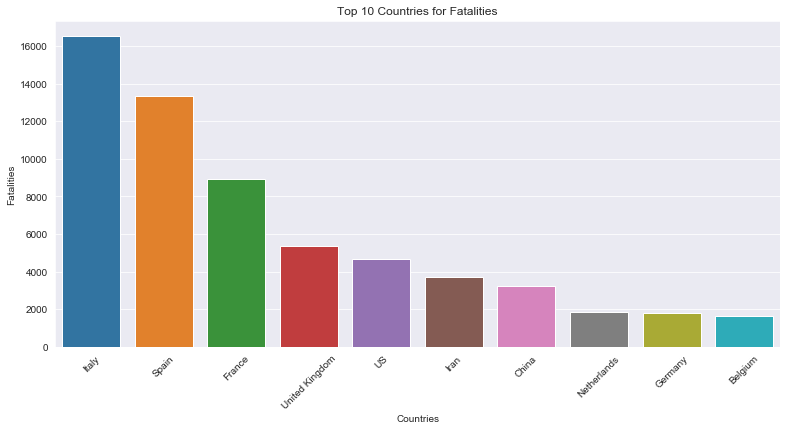

In [21]:
fig = plt.figure(figsize=(13,6))
sns.barplot(data=top_10, x='Country_Region', y='Fatalities')
plt.title('Top 10 Countries for Fatalities')
plt.xlabel('Countries')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

- Evolution of Covid 19 by country

We intend now to show the occurency of coronavirus in all countries considering time evolution. So, we'll have to group data by date and country region and than we'll gather this data in another dataframe called df_agroupado.

In [22]:
df_agrupado = df.groupby(['Date', 'Country_Region'])['ConfirmedCases', 'Fatalities','ConfirmedCases-Day', 'Fatalities-Day'].sum().reset_index()

In [23]:
df_agrupado.head()

,Date,Country_Region,ConfirmedCases,Fatalities,ConfirmedCases-Day,Fatalities-Day
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,0.0,0.0,0.0,0.0


In [24]:
df_agrupado.tail()

,Date,Country_Region,ConfirmedCases,Fatalities,ConfirmedCases-Day,Fatalities-Day
13675,2020-04-06,Venezuela,165.0,7.0,6.0,0.0
13676,2020-04-06,Vietnam,245.0,0.0,4.0,0.0
13677,2020-04-06,West Bank and Gaza,254.0,1.0,17.0,0.0
13678,2020-04-06,Zambia,39.0,1.0,0.0,0.0
13679,2020-04-06,Zimbabwe,10.0,1.0,1.0,0.0


In [25]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [26]:
import plotly.express as px
import plotly.io as pio

In [27]:
fig = px.choropleth(df_agrupado, 
                    locations='Country_Region', 
                    locationmode='country names',
                    color=np.log(df_agrupado['ConfirmedCases']), 
                    hover_name='Country_Region', 
                    hover_data=['ConfirmedCases', 'Fatalities'], 
                    animation_frame=df_agrupado['Date'].dt.strftime('%d-%m-%Y'),
                    color_continuous_scale=px.colors.sequential.Magenta)
fig.update_layout(autosize=False, width=900, height=500)
fig.show()

After push play button we can see how coronavirus spreads out all around the World.

## Brazil Analysis

In this section we are going to explore data about the occurence of Covid-19 in Brazil. Here, we intend to make a similar analysis that we made before and then to use some algorithm to predict occurrencies and fatalities in this country.

In [28]:
df_brasil = df[df['Country_Region'] == 'Brazil']

In [29]:
df_brasil.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,ConfirmedCases-Day,Fatalities-Day
2280,3211,Other,Brazil,2020-01-22,0.0,0.0,1,0.0,0.0
2281,3212,Other,Brazil,2020-01-23,0.0,0.0,1,0.0,0.0
2282,3213,Other,Brazil,2020-01-24,0.0,0.0,1,0.0,0.0
2283,3214,Other,Brazil,2020-01-25,0.0,0.0,1,0.0,0.0
2284,3215,Other,Brazil,2020-01-26,0.0,0.0,1,0.0,0.0
